# Data Exploration and Enrichment for Supervised Classification

### Portuguese wine through the lenses of Vivino's users

In [56]:
#Import the necessary libraries
import os, random, pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

In [57]:
#Import the merged dataset (which includes Red, White, Rosé, Sparkling, Dessert and Fortified wines from Portugal)
df = pd.read_csv('pt_wine_merged.csv', encoding='ISO-8859-1', sep=";")
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

In [58]:
#Display the dataframe
df

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
0,São João,1980,76447,Porta dos Cavaleiros Dão Tinto 1980,Red,4.3,81,37.50,Portugal,Dão
1,São João,1985,76446,Frei João Reserva 1985,Red,4.0,75,28.00,Portugal,Bairrada
2,São João,1985,1689617,Porta dos Cavaleiros Dão Reserva Tinto 1985,Red,4.2,57,29.90,Portugal,Dão
3,Casa Ferreirinha,1989,75980,Reserva Douro 1989,Red,4.5,157,180.00,Portugal,Douro
4,Cabriz,1990,1148718,Dão Reserva 1990,Red,3.8,525,39.95,Portugal,Dão
...,...,...,...,...,...,...,...,...,...,...
3276,Vasques de Carvalho,N.V.,3882596,40 Years Old Tawny Port N.V.,Fortified,4.6,164,206.00,Portugal,Porto
3277,Pacheca,N.V.,4904195,40 Years Tawny Porto N.V.,Fortified,4.6,637,100.80,Portugal,Porto
3278,Rozès,N.V.,1507187,Over 40 Years Old Tawny Port N.V.,Fortified,4.6,301,185.00,Portugal,Porto
3279,Vieira de Sousa,N.V.,3942014,Very Old White Port N.V.,Fortified,4.6,50,214.81,Portugal,Porto


In [59]:
# Calculate the mean of Rating, Number of Reviews and Price
avg_rating = df.Rating.mean()
avg_num_reviews = df.Num_Reviews.mean()
avg_price = df.Price.mean()

# Print the mean values with two decimal points
print(f"Average wine rating = {avg_rating:.2f}")
print(f"Average number of ratings = {avg_num_reviews:.2f}")
print(f"Average price bottle (750 ml) = {avg_price:.2f}€")

Average wine rating = 3.99
Average number of ratings = 419.47
Average price bottle (750 ml) = 36.39€


In [60]:
# Calculate the maximum of Rating, Number of Reviews, and Price
max_rating = df.Rating.max()
max_num_reviews = df.Num_Reviews.max()
max_price = df.Price.max()

# Print the maximum values with two decimal points
print(f"Highest rating = {max_rating:.2f}")
print(f"Highest number of ratings = {max_num_reviews:.2f}")
print(f"Highest price bottle (750 ml) = {max_price:.2f}€")

Highest rating = 4.80
Highest number of ratings = 86421.00
Highest price bottle (750 ml) = 2390.84€


In [61]:
# Calculate the minimum of Rating, Number of Reviews, and Price
min_rating = df.Rating.min()
min_num_reviews = df.Num_Reviews.min()
min_price = df.Price.min()

# Print the minimum values with two decimal points
print(f"Lowest rating = {min_rating:.2f}")
print(f"Lowest number of ratings = {min_num_reviews:.2f}")
print(f"Lowest price bottle (750 ml) = {min_price:.2f}€")

Lowest rating = 2.70
Lowest number of ratings = 50.00
Lowest price bottle (750 ml) = 1.25€


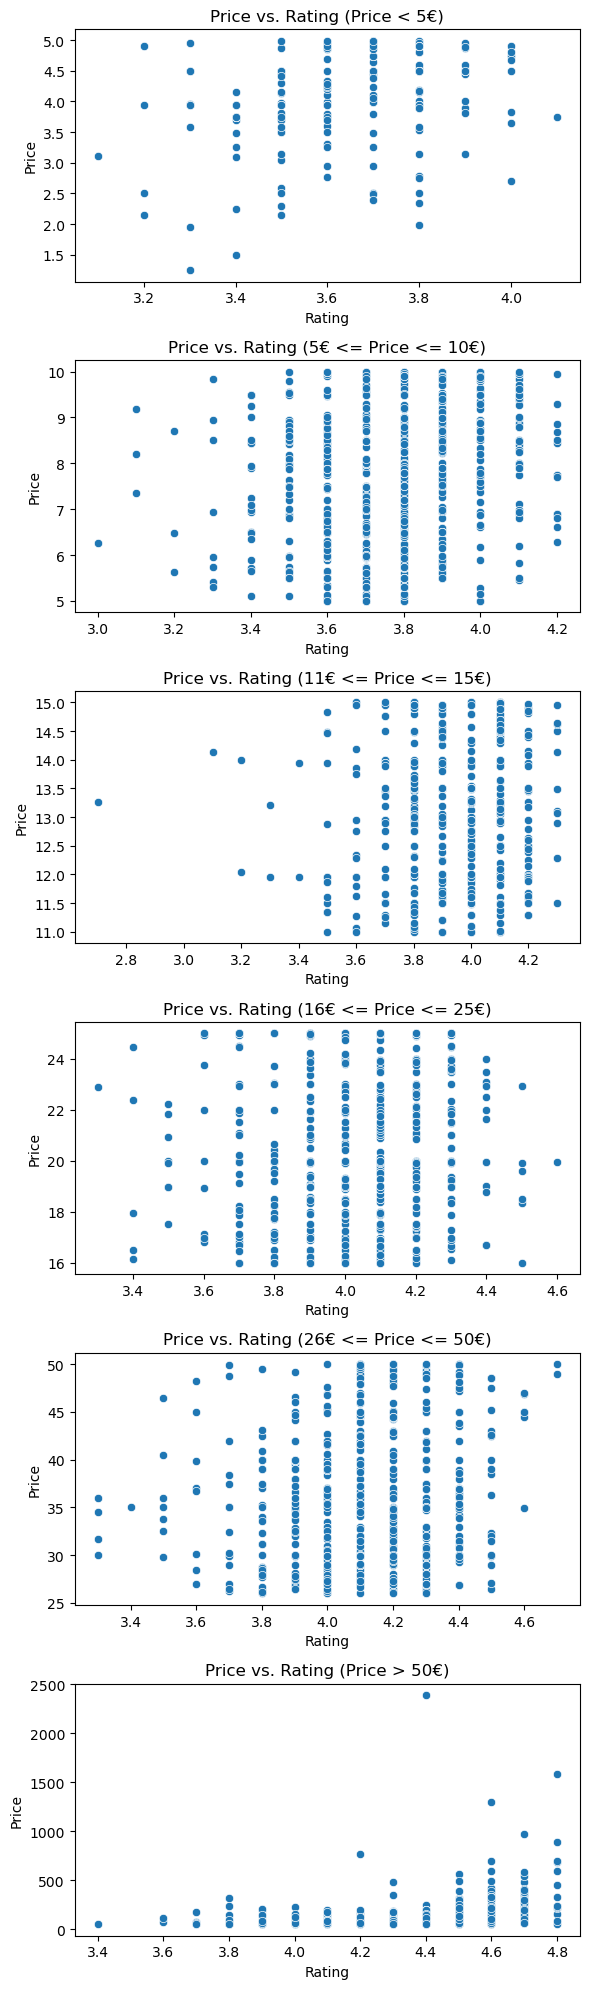

In [62]:
#Compare average rating and price of wines in different price categories: 
#less than 5€, between 5€ and 10€, between 11€ and 15€, between 16€ and 25€, between 26€ and 50€, and more than 50€.

fig, axes = plt.subplots(6, 1, figsize=(6, 20))

# Price < 5€
df1 = df[df['Price'] < 5]
sns.scatterplot(ax=axes[0], data=df1, x="Rating", y="Price")
axes[0].set_title("Price vs. Rating (Price < 5€)")

# 5€ <= Price <= 10€
df2 = df[(df['Price'] >= 5) & (df['Price'] <= 10)]
sns.scatterplot(ax=axes[1], data=df2, x="Rating", y="Price")
axes[1].set_title("Price vs. Rating (5€ <= Price <= 10€)")

# 11€ <= Price <= 15€
df3 = df[(df['Price'] >= 11) & (df['Price'] <= 15)]
sns.scatterplot(ax=axes[2], data=df3, x="Rating", y="Price")
axes[2].set_title("Price vs. Rating (11€ <= Price <= 15€)")

# 16€ <= Price <= 25€
df4 = df[(df['Price'] >= 16) & (df['Price'] <= 25)]
sns.scatterplot(ax=axes[3], data=df4, x="Rating", y="Price")
axes[3].set_title("Price vs. Rating (16€ <= Price <= 25€)")

# 26€ <= Price <= 50€
df5 = df[(df['Price'] >= 26) & (df['Price'] <= 50)]
sns.scatterplot(ax=axes[4], data=df5, x="Rating", y="Price")
axes[4].set_title("Price vs. Rating (26€ <= Price <= 50€)")

# Price > 50€
df6 = df[df['Price'] > 50]
sns.scatterplot(ax=axes[5], data=df6, x="Rating", y="Price")
axes[5].set_title("Price vs. Rating (Price > 50€)")

plt.tight_layout()
plt.show()


In [63]:
#Calculate the mean rating in each price category
mean_rating_1 = df1['Rating'].mean()
mean_rating_2 = df2['Rating'].mean()
mean_rating_3 = df3['Rating'].mean()
mean_rating_4 = df4['Rating'].mean()
mean_rating_5 = df5['Rating'].mean()
mean_rating_6 = df6['Rating'].mean()

print("Average Rating (Price < 5€):", mean_rating_1)
print("Average Rating (5€ <= Price <= 10€):", mean_rating_2)
print("Average Rating (11€ <= Price <= 15€):", mean_rating_3)
print("Average Rating (16€ <= Price <= 25€):", mean_rating_4)
print("Average Rating (26€ <= Price <= 50€):", mean_rating_5)
print("Average Rating (Price > 50€):", mean_rating_6)


Average Rating (Price < 5€): 3.6424418604651154
Average Rating (5€ <= Price <= 10€): 3.777532467532466
Average Rating (11€ <= Price <= 15€): 3.9279503105590052
Average Rating (16€ <= Price <= 25€): 4.033714285714284
Average Rating (26€ <= Price <= 50€): 4.110763888888885
Average Rating (Price > 50€): 4.3567307692307695


In [64]:
# Sort the DataFrames by 'Rating' in descending order
df1_top_rated = df1.sort_values(by='Rating', ascending=False)
df2_top_rated = df2.sort_values(by='Rating', ascending=False)
df3_top_rated = df3.sort_values(by='Rating', ascending=False)
df4_top_rated = df4.sort_values(by='Rating', ascending=False)
df5_top_rated = df5.sort_values(by='Rating', ascending=False)
df6_top_rated = df6.sort_values(by='Rating', ascending=False)

In [65]:
#Best and worst rated wines (Price < 5€)
df1_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
2904,Aveleda,2022,76416,Vinho Verde Fonte 2022,White,4.1,218,3.75,Portugal,Vinho Verde
2679,Aveleda,2020,76416,Vinho Verde Fonte 2020,White,4.0,2205,3.65,Portugal,Vinho Verde
2843,Quinta de Gomariz,2021,1282146,Loureiro 2021,White,4.0,145,4.68,Portugal,Vinho Verde
2839,Montes Ermos,2021,1618398,Douro Reserva Branco 2021,White,4.0,147,2.70,Portugal,Douro
2837,Quinta da Raza,2021,1740408,Dom Diogo Arinto 2021,White,4.0,73,4.80,Portugal,Vinho Verde
...,...,...,...,...,...,...,...,...,...,...
1644,Paulo Laureano,2011,1736719,Clássico Branco 2011,White,3.2,146,2.50,Portugal,Alentejo
1679,Burmester,2012,1454644,Branco White Blanc Douro 2012,White,3.2,97,4.90,Portugal,Douro
1766,Burmester,2014,2258548,Tavedo Branco Douro 2014,White,3.2,128,2.15,Portugal,Douro
176,Quinta do Bucheiro,2012,1577300,Ceirós Tinto 2012,Red,3.2,115,3.95,Portugal,Douro


In [66]:
#Best and worst rated wines (5€ <= Price <= 10€)
df2_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
3229,Taylor's,N.V.,2325662,Tawny Porto N.V.,Fortified,4.2,109,9.95,Portugal,Porto
2905,Soalheiro,2022,1175699,Alvarinho 2022,White,4.2,381,6.80,Portugal,Vinho Verde
1232,Quinta Nova de Nossa Senhora do Carmo,2021,1274033,Douro Tinto (Colheita Unoaked) 2021,Red,4.2,370,8.85,Portugal,Douro
1196,Casa Ermelinda Freitas,2020,1377489,Dona Ermelinda Reserva Palmela 2020,Red,4.2,810,6.28,Portugal,Península de Setúbal
1193,Malhadinha Nova,2020,1226145,Alentejano Monte da Peceguina Tinto 2020,Red,4.2,1409,6.90,Portugal,Alentejo
...,...,...,...,...,...,...,...,...,...,...
103,Torre de Coimbra,2010,1911299,Bairrada Tinto 2010,Red,3.2,129,8.70,Portugal,Bairrada
130,Quinta do Cardo,2011,1171515,Tinto 2011,Red,3.1,1122,9.19,Portugal,Beiras
2909,Quevedo,N.V.,6896796,Dry White Port N.V.,Fortified,3.1,55,8.20,Portugal,Porto
2908,Borges,N.V.,3689185,Coroa Dry White Port N.V.,Fortified,3.1,178,7.36,Portugal,Porto


In [67]:
#Best and worst rated wines (11€ <= Price <= 15€)
df3_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
1203,Quinta Nova de Nossa Senhora do Carmo,2020,1166949,Douro Reserva 2020,Red,4.3,248,14.63,Portugal,Douro
2581,Cortes do Tua,2019,6012043,Reserva Branco 2019,White,4.3,76,11.50,Portugal,Douro
860,Quinta Dona Doroteia,2017,1383581,Reserva 2017,Red,4.3,572,14.50,Portugal,Douro
1206,Pessegueiro,2020,10098027,Reserva Tinto 2020,Red,4.3,95,14.95,Portugal,Douro
2021,Oboé,2016,1381143,Reserva Branco 2016,White,4.3,61,12.29,Portugal,Douro
...,...,...,...,...,...,...,...,...,...,...
1720,Porca de Murca,2013,1143310,Branco 2013,White,3.3,709,11.95,Portugal,Douro
1719,Adega Cooperativa de Vidigueira,2013,1919546,Vila Ruiva Reserva Branco 2013,White,3.2,410,12.05,Portugal,Alentejo
104,Quinta do Crasto,2010,45244,Crasto Red 2010,Red,3.2,794,14.00,Portugal,Douro
2910,Robertson's,N.V.,1606374,Ruby Porto N.V.,Fortified,3.1,70,14.13,Portugal,Porto


In [68]:
#Best and worst rated wines (16€ <= Price <= 25€)
df4_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
2381,XXVI Talhas,2018,7645384,Mestre Daniel Branco 2018,White,4.6,62,19.95,Portugal,Alentejo
417,Quinta do Pégo,2014,5461342,Douro Vinhas Velhas 2014,Red,4.5,71,18.33,Portugal,Douro
2378,Lavradores de Feitoria,2018,1262782,Meruge Branco 2018,White,4.5,194,19.60,Portugal,Douro
1514,Bacalhôa,2003,2694002,Moscatel De Setúbal Superior 2003,Fortified,4.5,65,16.00,Portugal,Península de Setúbal
1209,Casal da Coelheira,2020,1254630,Mythos 2020,Red,4.5,124,19.90,Portugal,Tejo
...,...,...,...,...,...,...,...,...,...,...
1549,Aphros,2006,2298468,Yakkos Grande Reserva 2006,Sparkling,3.4,57,16.50,Portugal,Vinho Verde
178,Colinas de São Lourenço,2012,1230185,Bairrada Red 2012,Red,3.4,161,22.40,Portugal,Bairrada
581,Terras do Avo,2016,1307679,Tinto 2016,Red,3.4,65,16.14,Portugal,Madeira
338,Quinta do Cardo,2014,1171515,Tinto 2014,Red,3.4,219,17.95,Portugal,Beiras


In [69]:
#Best and worst rated wines (26€ <= Price <= 50€)
df5_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
878,Jorge Rosa Santos,2017,5351911,Rosa Santos Familia Ribera de Tera 2017,Red,4.7,122,48.95,Portugal,Alentejo
2382,Cartuxa,2018,1870315,Pêra-Manca Branco 2018,White,4.7,1985,50.00,Portugal,Alentejo
1677,Osvaldo Amado,2011,8536344,Rarissimo Branco 2011,White,4.6,105,46.90,Portugal,Dão
574,Quinta do Banco,2015,3955378,Grande Reserva 2015,Red,4.6,57,44.50,Portugal,Douro
245,Quinta dos Aciprestes,2012,6106031,Grande Reserva Sousão 2012,Red,4.6,107,45.00,Portugal,Douro
...,...,...,...,...,...,...,...,...,...,...
1611,Rozès,2009,1135751,Vintage Port 2009,Fortified,3.4,104,35.00,Portugal,Porto
2913,Messias,N.V.,1315968,Tower's Tawny Port N.V.,Fortified,3.3,258,34.50,Portugal,Porto
177,Casa Agrícola HMR,2012,1397230,Pousio Tinto 2012,Red,3.3,187,30.00,Portugal,Alentejo
1589,Boeira,2008,4784717,Colheita Port 2008,Fortified,3.3,52,31.68,Portugal,Porto


In [70]:
#Best and worst rated wines (Price > 50€)
df6_top_rated

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region
1246,Krohn,1960,1136061,Colheita Port 1960,Fortified,4.8,62,223.58,Portugal,Porto
577,Luis Pato,2015,22317,Baga Beiras Quinta do Ribeirinho Pé Franco 2015,Red,4.8,105,159.00,Portugal,Beiras
2383,Ferreira,2018,75996,Vintage Port 2018,Fortified,4.8,187,88.15,Portugal,Porto
174,Douro Boys,2011,1639135,Cuvée 2011,Red,4.8,123,888.00,Portugal,Douro
1259,Taylor's,1966,1598998,Very Old Single Harvest Port 1966,Fortified,4.8,389,325.00,Portugal,Porto
...,...,...,...,...,...,...,...,...,...,...
1733,Poças,2013,1150822,Vintage Port 2013,Fortified,3.7,78,51.44,Portugal,Porto
445,Herdade da Pimenta,2015,1270652,Preta 2015,Red,3.7,366,69.90,Portugal,Alentejo
256,Quinta do Portal,2013,1380962,Colheita Red 2013,Red,3.6,1428,75.03,Portugal,Douro
1398,Romariz,1997,1180273,Vintage Port 1997,Fortified,3.6,52,115.13,Portugal,Porto


In [71]:
# Group the data by 'Region' and calculate the average rating and average price for each region
region_comparison = df.groupby('Region').agg({'Rating': 'mean', 'Price': 'mean'}).reset_index()

# Sort the results by the average rating and average price in descending order
region_comparison_by_rating = region_comparison.sort_values(by='Rating', ascending=False)
region_comparison_by_price = region_comparison.sort_values(by='Price', ascending=False)

# Display the results
print("Regions sorted by Average Rating:\n", region_comparison_by_rating)
print("\nRegions sorted by Average Price:\n", region_comparison_by_price)


Regions sorted by Average Rating:
                   Region    Rating      Price
12                 Porto  4.073216  68.630269
7                  Douro  4.032243  33.483492
2                 Açores  4.027273  23.890000
15         Távora-Varosa  4.000000  14.294000
14        Trás-os-Montes  3.992857  16.705357
..                   ...       ...        ...
6                Colares  3.900000  34.161111
1                Algarve  3.882609  16.881304
11  Península de Setúbal  3.878723  13.347872
13                  Tejo  3.833333  11.989141
9                 Lisboa  3.829915  14.962137

[17 rows x 3 columns]

Regions sorted by Average Price:
                   Region    Rating      Price
12                 Porto  4.073216  68.630269
10               Madeira  3.960465  38.653915
6                Colares  3.900000  34.161111
7                  Douro  4.032243  33.483492
3               Bairrada  3.954717  24.758491
..                   ...       ...        ...
16           Vinho Verde  3.94527

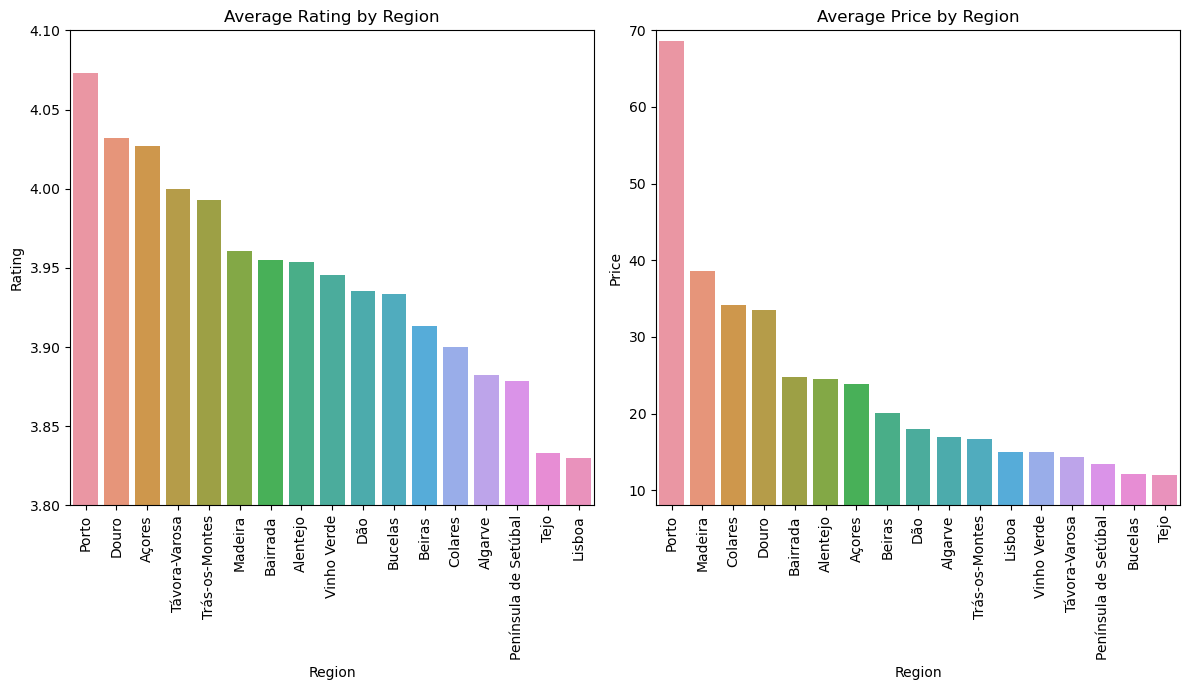

In [72]:
#Represent the above data visually

# Set the size of the plots
plt.figure(figsize=(12, 7))

# Create a bar plot for the average rating of each region
plt.subplot(1, 2, 1)
sns.barplot(data=region_comparison_by_rating, x='Region', y='Rating')
plt.xticks(rotation=90)
plt.ylim(3.8, 4.1)
plt.title("Average Rating by Region")

# Create a bar plot for the average price of each region
plt.subplot(1, 2, 2)
sns.barplot(data=region_comparison_by_price, x='Region', y='Price')
plt.xticks(rotation=90)
plt.ylim(8, 70)
plt.title("Average Price by Region")

# Display the plots
plt.tight_layout()
plt.show()

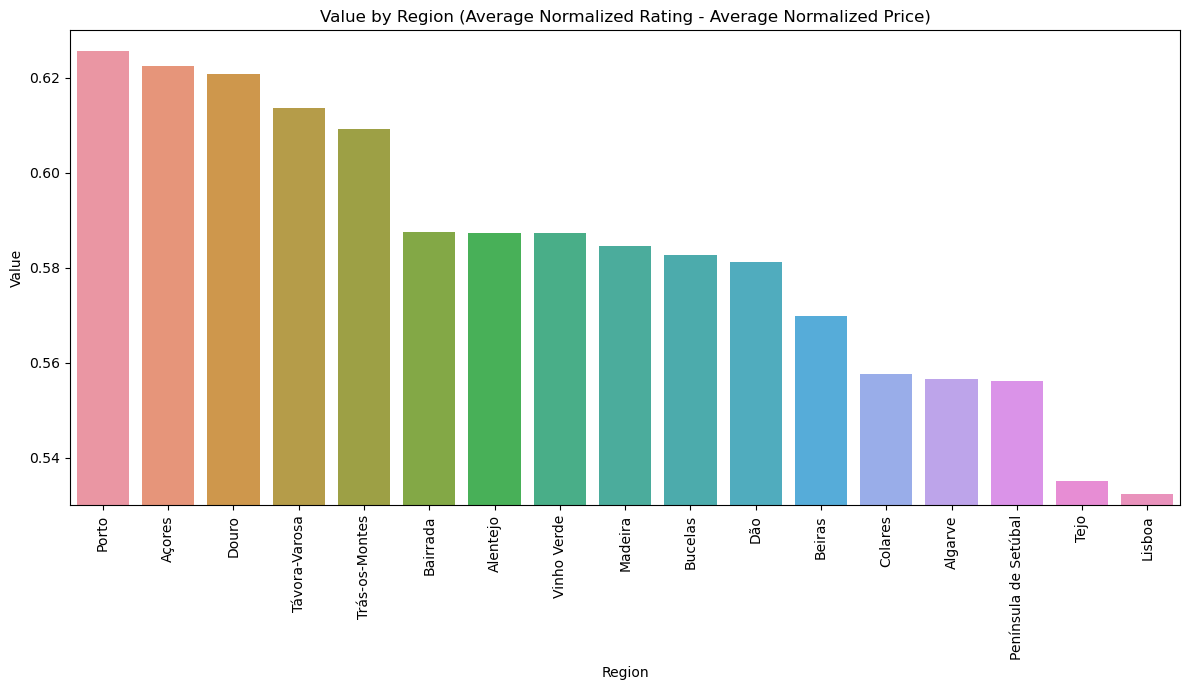

In [73]:
# The rating and price were normalized to a range of 0 to 1
df['Normalized_Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Normalized_Price'] = (df['Price'] - df['Price'].min()) / (df['Price'].max() - df['Price'].min())

# Group by region and calculate the average normalized rating and price for each region
region_comparison_normalized = df.groupby('Region')[['Normalized_Rating', 'Normalized_Price']].mean().reset_index()

# Calculate the value as the difference between average normalized rating and average normalized price
region_comparison_normalized['Value'] = region_comparison_normalized['Normalized_Rating'] - region_comparison_normalized['Normalized_Price']

# Sort the regions based on the value column
region_comparison_by_value_normalized = region_comparison_normalized.sort_values(by='Value', ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 7))

# Create a bar plot for the value of each region
sns.barplot(data=region_comparison_by_value_normalized, x='Region', y='Value')
plt.xticks(rotation=90)
plt.title("Value by Region (Average Normalized Rating - Average Normalized Price)")
plt.ylim(0.53, 0.63)

# Display the plot
plt.tight_layout()
plt.show()


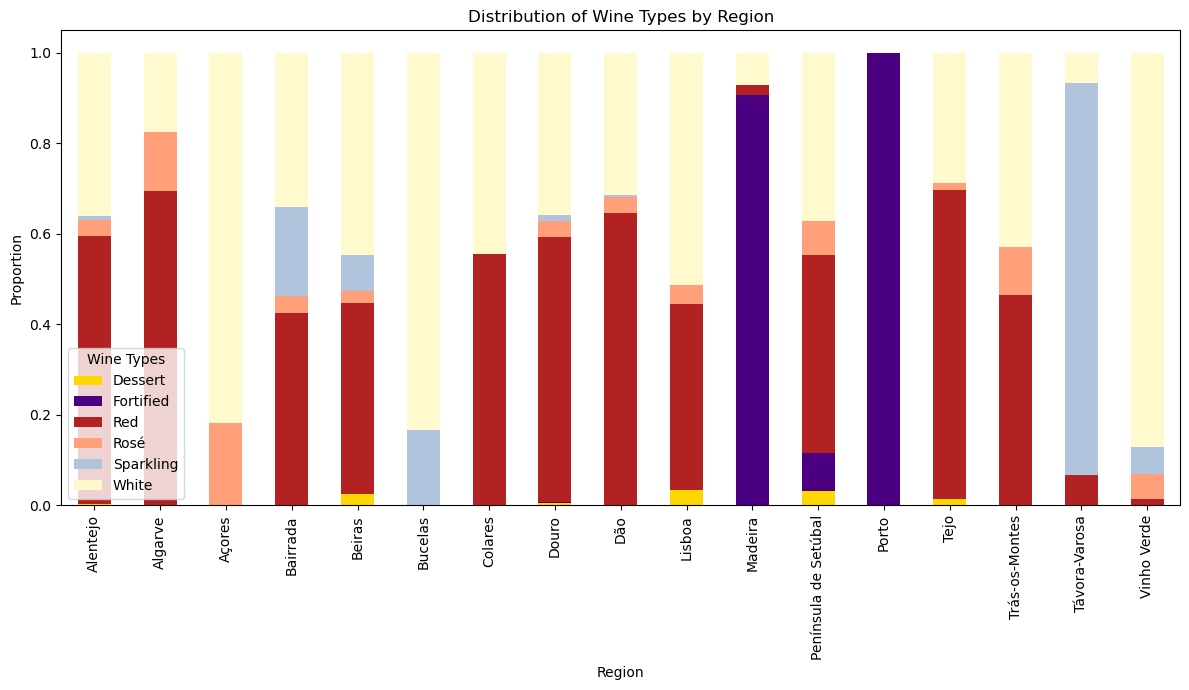

In [74]:
# Create a cross-tabulation of wine types by region
wine_types_by_region = pd.crosstab(df['Region'], df['Type'])

# Normalize the cross-tabulation to show the proportion of wine types within each region
wine_types_by_region_normalized = wine_types_by_region.div(wine_types_by_region.sum(axis=1), axis=0)

# Define custom colors for each wine type
colors = {
    'Red': 'firebrick',
    'Fortified': 'indigo',
    'White': 'lemonchiffon',
    'Rosé': 'lightsalmon',
    'Sparkling': 'lightsteelblue',
    'Dessert': 'gold'
}

# Create a stacked bar chart to visualize the distribution of wine types in each region
wine_types_by_region_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=[colors[col] for col in wine_types_by_region_normalized.columns]
)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Distribution of Wine Types by Region')
plt.legend(title='Wine Types')

# Display the plot
plt.tight_layout()
plt.show()

In [75]:
# Group the data by 'Type' and calculate the average rating and average price for each type
type_comparison = df.groupby('Type').agg({'Rating': 'mean', 'Price': 'mean'}).reset_index()

# Sort the results by the average rating and average price in descending order
type_comparison_by_rating = type_comparison.sort_values(by='Rating', ascending=False)
type_comparison_by_price = type_comparison.sort_values(by='Price', ascending=False)

# Display the results
print("Wine Types sorted by Average Rating:\n", type_comparison_by_rating)
print("\n Wine Types sorted by Average Price:\n", type_comparison_by_price)

Wine Types sorted by Average Rating:
         Type    Rating      Price
0    Dessert  4.123529  21.267059
1  Fortified  4.069801  67.030828
2        Red  4.005168  32.852271
5      White  3.930216  16.540787
4  Sparkling  3.916901  17.487042
3       Rosé  3.823711  11.043956

 Wine Types sorted by Average Price:
         Type    Rating      Price
1  Fortified  4.069801  67.030828
2        Red  4.005168  32.852271
0    Dessert  4.123529  21.267059
4  Sparkling  3.916901  17.487042
5      White  3.930216  16.540787
3       Rosé  3.823711  11.043956


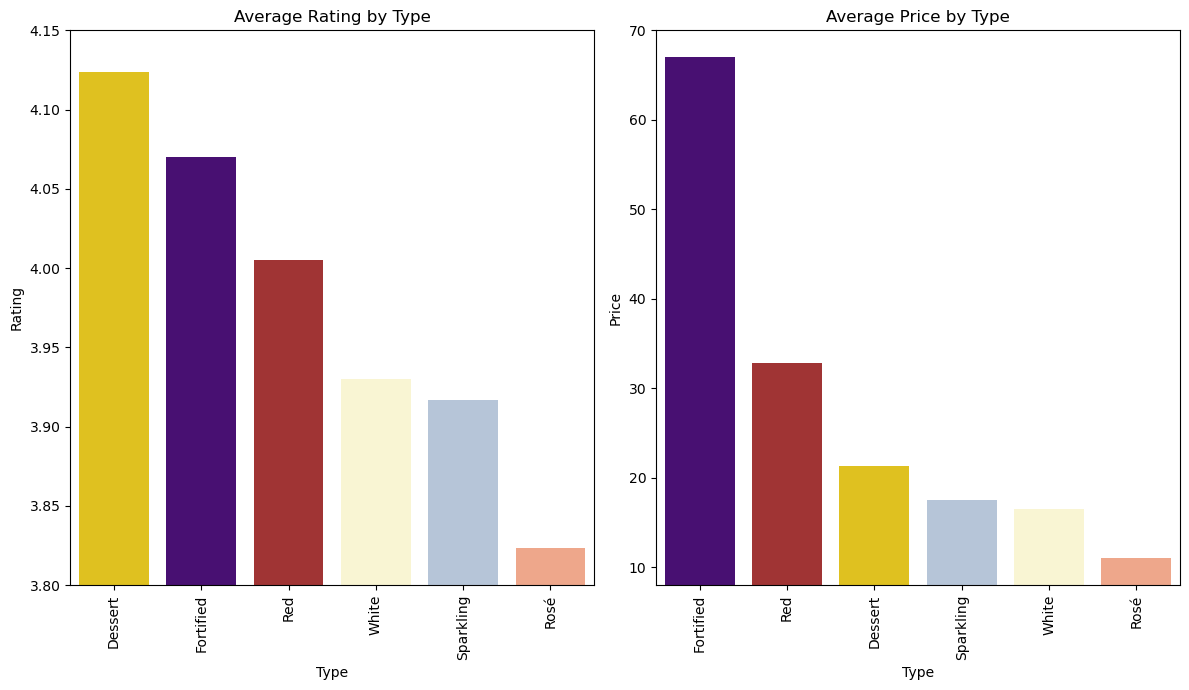

In [76]:
# Represent the above data visually

# Set the size of the plots
plt.figure(figsize=(12, 7))

# Define custom colors for each wine type
colors = {
    'Red': 'firebrick',
    'Fortified': 'indigo',
    'White': 'lemonchiffon',
    'Rosé': 'lightsalmon',
    'Sparkling': 'lightsteelblue',
    'Dessert': 'gold'
    }

# Create a bar plot for the average rating of each type
plt.subplot(1, 2, 1)
sns.barplot(data=type_comparison_by_rating, x='Type', y='Rating', palette=colors)
plt.xticks(rotation=90)
plt.ylim(3.8, 4.15)
plt.title("Average Rating by Type")

# Create a bar plot for the average price of each type
plt.subplot(1, 2, 2)
sns.barplot(data=type_comparison_by_price, x='Type', y='Price', palette=colors)
plt.xticks(rotation=90)
plt.ylim(8, 70)
plt.title("Average Price by Type")

# Display the plots
plt.tight_layout()
plt.show()


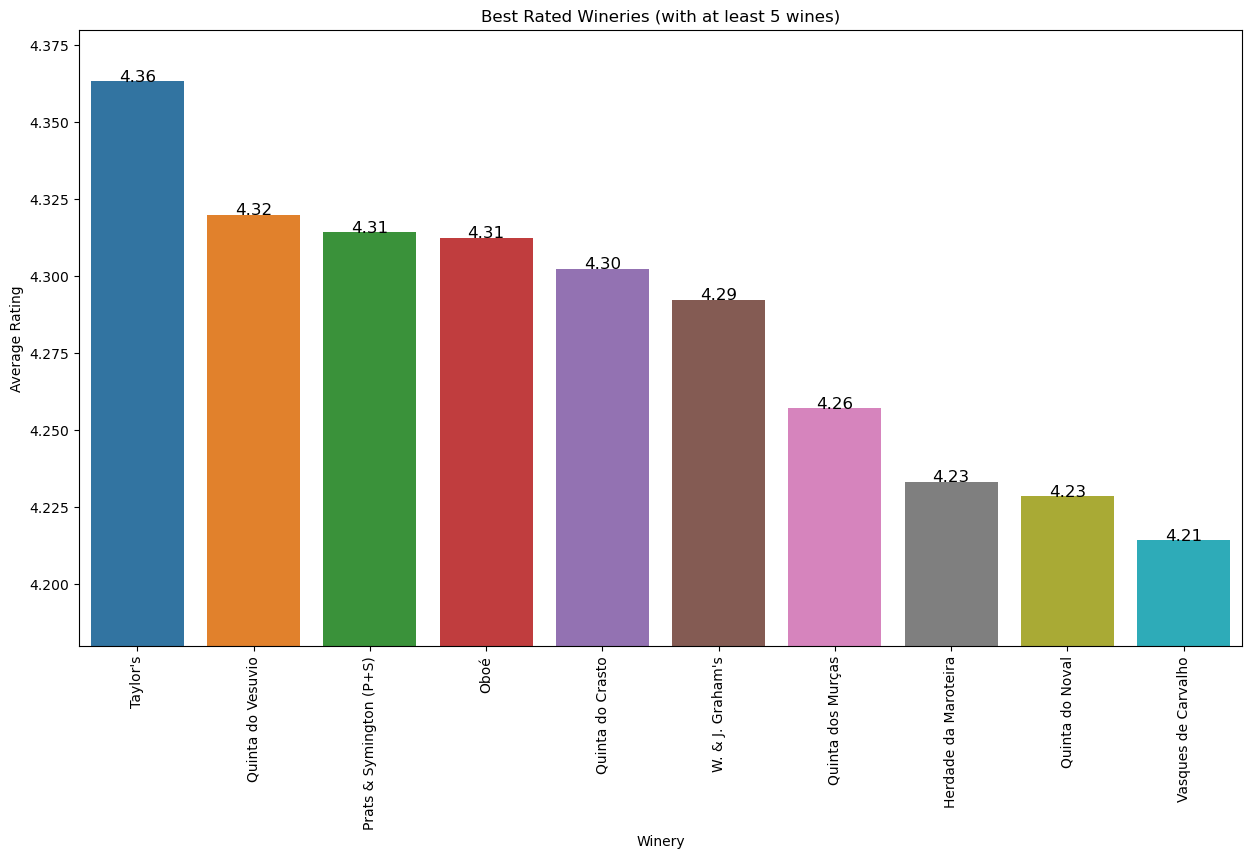

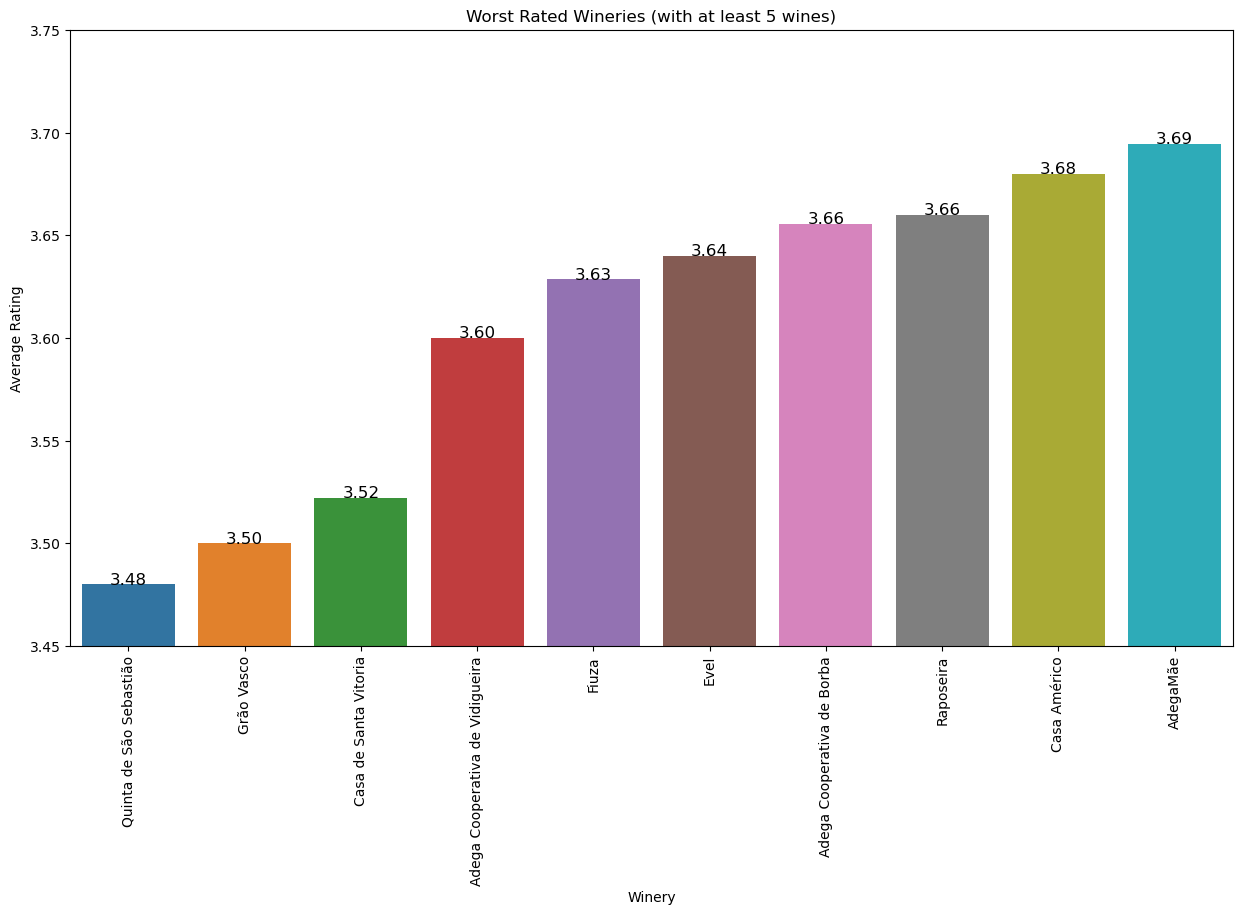

In [77]:
# Group the data by winery
winery_group = df.groupby('Winery')

# Filter wineries with at least 5 different wines rated
winery_filtered = winery_group.filter(lambda x: len(x) >= 5)

# Group the filtered data by winery and calculate the average rating
winery_ratings_filtered = winery_filtered.groupby('Winery')['Rating'].mean()

# Sort the wineries by their average ratings
best_rated_wineries_filtered = winery_ratings_filtered.sort_values(ascending=False)
worst_rated_wineries_filtered = winery_ratings_filtered.sort_values(ascending=True)

# Function to add labels on the bars
def add_labels(ax, data):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center', fontsize=12)

# Plot the best-rated wineries
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax1, x=best_rated_wineries_filtered.head(10).index, y=best_rated_wineries_filtered.head(10))
plt.xticks(rotation=90)
plt.title("Best Rated Wineries (with at least 5 wines)")
plt.xlabel("Winery")
plt.ylabel("Average Rating")
plt.ylim(4.18, 4.38)

add_labels(ax1, best_rated_wineries_filtered.head(10))

plt.show()

# Plot the worst-rated wineries
fig, ax2 = plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax2, x=worst_rated_wineries_filtered.head(10).index, y=worst_rated_wineries_filtered.head(10))
plt.xticks(rotation=90)
plt.title("Worst Rated Wineries (with at least 5 wines)")
plt.xlabel("Winery")
plt.ylabel("Average Rating")
plt.ylim(3.45, 3.75)

add_labels(ax2, worst_rated_wineries_filtered.head(10))

plt.show()




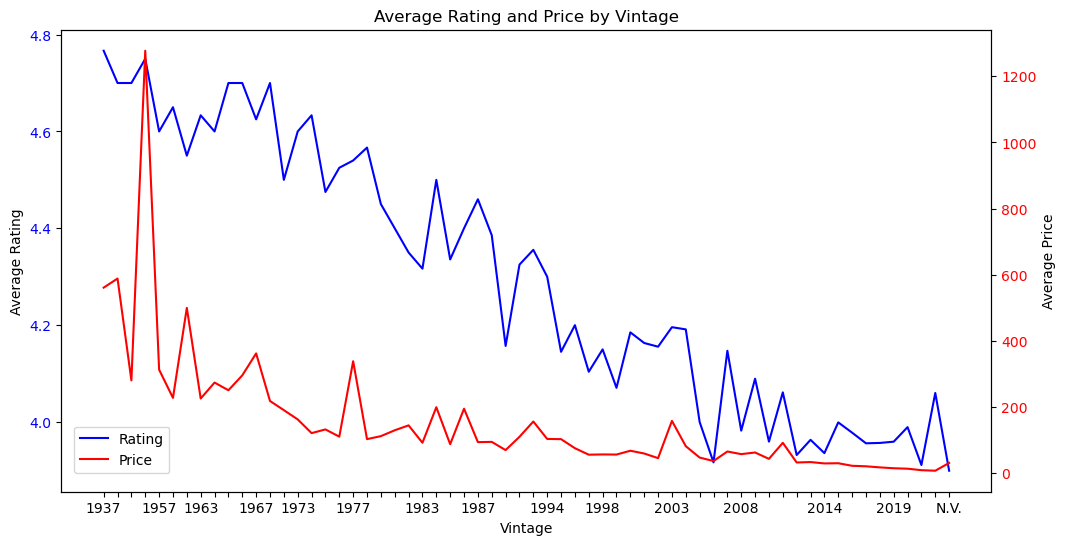

In [78]:
# Group the data by vintage (year) and calculate the average rating and price
vintage_data = df.groupby('Year')[['Rating', 'Price']].mean().reset_index()

# Create a line plot to visualize the average rating and price for each vintage
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Average Rating and Price by Vintage')
ax1.set_xlabel('Vintage')
ax1.set_ylabel('Average Rating')
ax1.plot(vintage_data['Year'], vintage_data['Rating'], color='blue', label='Rating')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Price')
ax2.plot(vintage_data['Year'], vintage_data['Price'], color='red', label='Price')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.23))

# Set custom x-axis tick locations and labels
all_vintages = vintage_data['Year'].tolist()
selected_vintages = ["1937", "1957", "1963", "1967", "1973", "1977", "1983", "1987", "1994", "1998", "2003", "2008", "2014", "2019", "N.V."]

ax1.set_xticks(all_vintages)
ax1.set_xticklabels([str(vintage) if vintage in selected_vintages else '' for vintage in all_vintages])

plt.show()


In [79]:
# Print the average rating for each vintage/year
print(vintage_data)

    Year    Rating        Price
0   1937  4.766667   560.960000
1   1941  4.700000   588.500000
2   1950  4.700000   280.490000
3   1952  4.750000  1277.165000
4   1957  4.600000   313.010000
..   ...       ...          ...
57  2019  3.959412    14.972441
58  2020  3.989450    13.582667
59  2021  3.911290     9.110255
60  2022  4.060000     7.476000
61  N.V.  3.899467    31.002689

[62 rows x 3 columns]


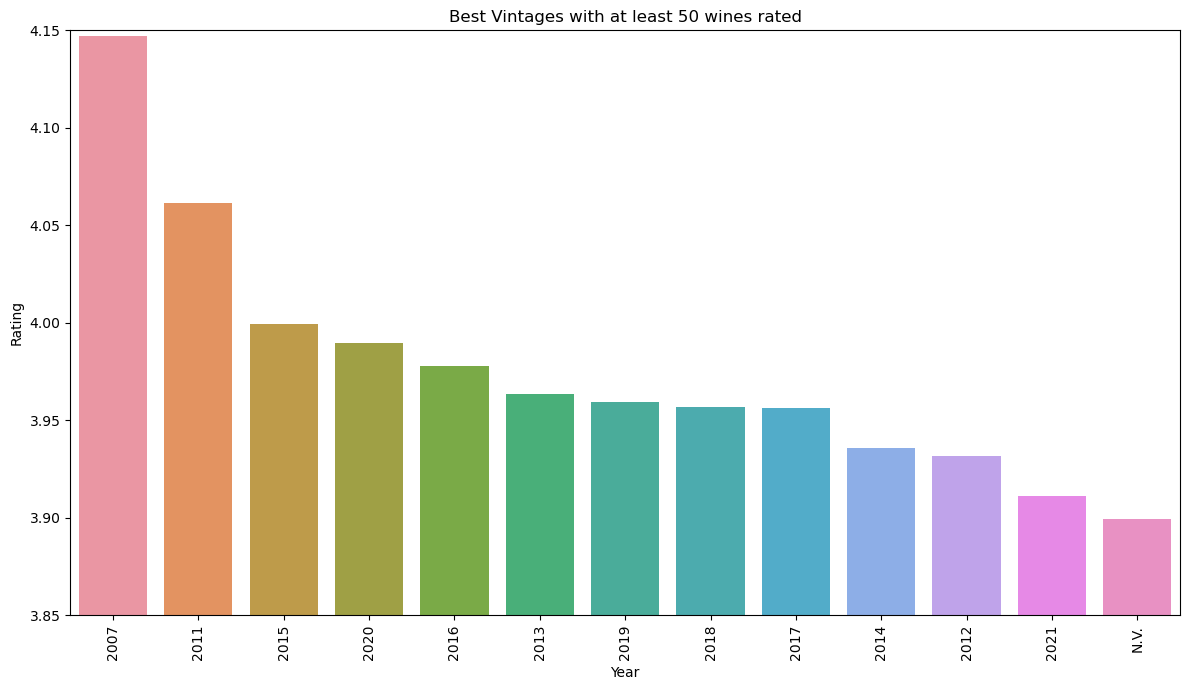

In [80]:
# Calculate the count of wines for each vintage
vintage_counts = df.groupby('Year')['Wine'].count().reset_index()

# Merge vintage_data with vintage_counts
vintage_data_with_counts = pd.merge(vintage_data, vintage_counts, on='Year')

# Filter the data to keep only vintages with at least 50 wines
vintages_with_50_wines = vintage_data_with_counts[vintage_data_with_counts['Wine'] >= 50]

# Sort by rating
vintages_with_50_wines_sorted = vintages_with_50_wines.sort_values(by='Rating', ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 7))

# Create a bar plot for the average rating of each vintage with at least 50 wines
sns.barplot(data=vintages_with_50_wines_sorted, x='Year', y='Rating')
plt.xticks(rotation=90)
plt.title("Best Vintages with at least 50 wines rated")

# Set y-axis limits
plt.ylim(3.85, 4.15)

# Display the plot
plt.tight_layout()
plt.show()



In [81]:
# Convert wine ratings to categories bad, mediocre, good or great

def categorize_wine(rating):
    if rating <= 3.6:
        return 'bad'
    elif 3.7 <= rating <= 3.9:
        return 'mediocre'
    elif 4.0 <= rating <= 4.2:
        return 'good'
    else:
        return 'great'

df['Category'] = df['Rating'].apply(categorize_wine)

In [82]:
df

,Winery,Year,Wine ID,Wine,Type,Rating,Num_Reviews,Price,Country,Region,Normalized_Rating,Normalized_Price,Category
0,São João,1980,76447,Porta dos Cavaleiros Dão Tinto 1980,Red,4.3,81,37.50,Portugal,Dão,0.761905,0.015170,great
1,São João,1985,76446,Frei João Reserva 1985,Red,4.0,75,28.00,Portugal,Bairrada,0.619048,0.011194,good
2,São João,1985,1689617,Porta dos Cavaleiros Dão Reserva Tinto 1985,Red,4.2,57,29.90,Portugal,Dão,0.714286,0.011990,good
3,Casa Ferreirinha,1989,75980,Reserva Douro 1989,Red,4.5,157,180.00,Portugal,Douro,0.857143,0.074804,great
4,Cabriz,1990,1148718,Dão Reserva 1990,Red,3.8,525,39.95,Portugal,Dão,0.523810,0.016195,mediocre
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,Vasques de Carvalho,N.V.,3882596,40 Years Old Tawny Port N.V.,Fortified,4.6,164,206.00,Portugal,Porto,0.904762,0.085684,great
3277,Pacheca,N.V.,4904195,40 Years Tawny Porto N.V.,Fortified,4.6,637,100.80,Portugal,Porto,0.904762,0.041660,great
3278,Rozès,N.V.,1507187,Over 40 Years Old Tawny Port N.V.,Fortified,4.6,301,185.00,Portugal,Porto,0.904762,0.076896,great
3279,Vieira de Sousa,N.V.,3942014,Very Old White Port N.V.,Fortified,4.6,50,214.81,Portugal,Porto,0.904762,0.089371,great


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create model based on Winery
X = df[['Winery']]
y = df[['Category']]

# Preprocess the data (encode categorical features)
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=3, criterion="gini", random_state=0)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.37674216027874563

Testing set accuracy: 0.33401015228426395


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create model based on Year


# Convert 'N.V.' values to zero
df['Year'] = df['Year'].replace('N.V.', 0)

# Fill NaN values with 0
df['Year'] = df['Year'].fillna(0)

# Convert to integers
df['Year'] = df['Year'].astype(int)

X = df[['Year']]
y = df[['Category']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
tree = DecisionTreeClassifier(max_leaf_nodes=3, criterion="gini", random_state=0)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.39939024390243905

Testing set accuracy: 0.36548223350253806


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create model based on Type
X = df[['Type']]
y = df[['Category']]

# Preprocess the data (encode categorical features)
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=48, criterion="gini", random_state=123)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.37456445993031356

Testing set accuracy: 0.3583756345177665


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create model based on Price
X = df[['Price']]
y = df[['Category']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=48, criterion="gini", random_state=123)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.6167247386759582

Testing set accuracy: 0.5401015228426396


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Create model based on Number of Reviews
X = df[['Num_Reviews']]
y = df[['Category']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=3, criterion="gini", random_state=123)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.3832752613240418

Testing set accuracy: 0.349238578680203


In [88]:
# Create model based on Region
X = df[['Region']]
y = df[['Category']]

# Preprocess the data (encode categorical features)
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=3, criterion="gini", random_state=123)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.3789198606271777

Testing set accuracy: 0.3715736040609137


In [89]:
# Create a model that combines all the columns analysed above to predict rating categoryfrom sklearn.compose import ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select the relevant columns
X = df[["Winery", "Region", "Year", "Price", "Num_Reviews", "Type"]]
y = df["Category"]

# Replace 'N.V.' values in the Year column with 0
X_new = X.copy()
X_new.loc[:, 'Year'] = X['Year'].replace('N.V.', 0).astype(float)

# Fill missing values in the Price column with the mean
X_new.loc[:, 'Price'] = X['Price'].fillna(X['Price'].mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Price', 'Num_Reviews']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Winery', 'Region', 'Type'])
    ])

# Create a Decision Tree model and test its accuracy
tree = DecisionTreeClassifier(max_leaf_nodes=24, criterion="gini", random_state=123)

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', tree)
])

# Train the model using the fit() function
pipeline.fit(X_train, y_train)

# Predict on the training set
preds_train = pipeline.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds_train)
print("Training set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = pipeline.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Testing set accuracy:", test_accuracy)




Training set accuracy: 0.632404181184669
Testing set accuracy: 0.6050761421319797


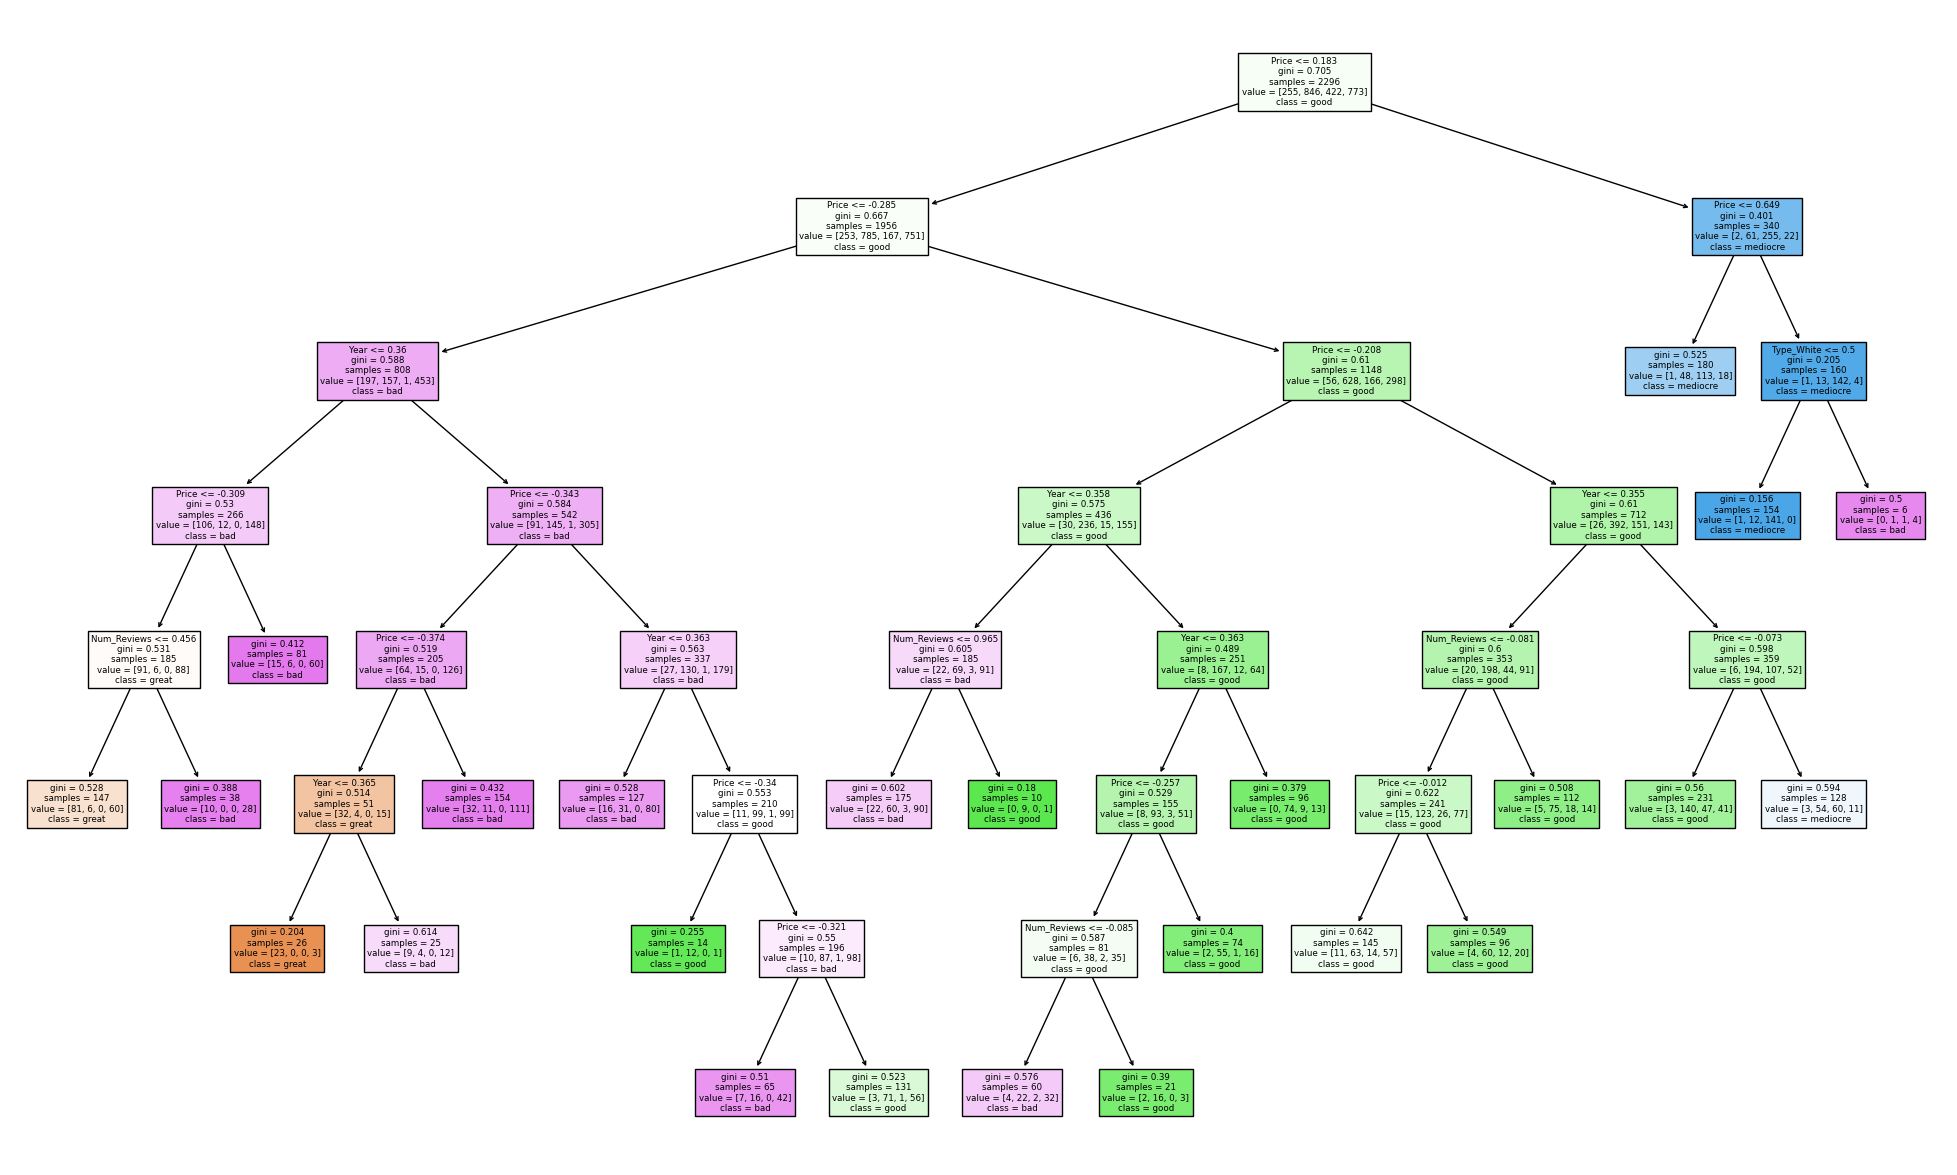

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the categorical and numeric features
categorical_features = ['Winery', 'Region', 'Type']
numeric_features = ['Year', 'Price', 'Num_Reviews']

# Fit the pipeline and get the trained classifier
pipeline.fit(X_train, y_train)
trained_classifier = pipeline.named_steps['classifier']

# Get the list of feature names after one-hot encoding
onehot_columns = list(pipeline.named_steps['preprocessor']
                      .transformers_[1][1]
                      .get_feature_names_out(input_features=categorical_features))

# Combine the list with the numeric feature names
feature_names = numeric_features + onehot_columns

# Plot the decision tree
plt.figure(figsize=(25, 15))
plot_tree(trained_classifier, filled=True, feature_names=feature_names, class_names=y.unique())
plt.show()


In [91]:
# Create model based on Year + Price

# Convert 'N.V.' values to zero
df['Year'] = df['Year'].replace('N.V.', 0)

# Fill NaN values with 0
df['Year'] = df['Year'].fillna(0)

# Convert to integers
df['Year'] = df['Year'].astype(int)

X = df[['Year', 'Price']]
y = df[['Category']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Decision Tree model and test its accuracy
tree = DecisionTreeClassifier(max_leaf_nodes=3, criterion="gini", random_state=123)

# Train the model using the fit() function
tree.fit(X=X_train, y=y_train)

# Predict on the training set
preds = tree.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = tree.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.5818815331010453

Testing set accuracy: 0.5522842639593909


In [92]:
# Create model based on Year + Price (RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier

# Convert 'N.V.' values to zero
df['Year'] = df['Year'].replace('N.V.', 0)

# Fill NaN values with 0
df['Year'] = df['Year'].fillna(0)

# Convert to integers
df['Year'] = df['Year'].astype(int)

X = df[['Year', 'Price']]
y = df[['Category']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Calculate the distribution of the output label in the train set
y_train_distribution = y_train['Category'].value_counts(normalize=True) * 100

# Calculate the distribution of the output label in the test set
y_test_distribution = y_test['Category'].value_counts(normalize=True) * 100

# Display the distributions
print("Distribution of Category in the train set:\n", y_train_distribution)
print("\nDistribution of Category in the test set:\n", y_test_distribution)

# Create a Random Forest model
forest = RandomForestClassifier(n_estimators=3, criterion="gini", random_state=123)

# Train the model using the fit() function
forest.fit(X=X_train, y=y_train.values.ravel())

# Predict on the training set
preds = forest.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds)
print("\nTraining set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = forest.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("\nTesting set accuracy:", test_accuracy)


Distribution of Category in the train set:
 good        36.846690
mediocre    33.667247
great       18.379791
bad         11.106272
Name: Category, dtype: float64

Distribution of Category in the test set:
 mediocre    34.416244
good        33.502538
great       20.203046
bad         11.878173
Name: Category, dtype: float64

Training set accuracy: 0.8440766550522648

Testing set accuracy: 0.4883248730964467


In [93]:
# Create a model that combines all the columns previously analysed above to predict rating category (now with RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Select the relevant columns
X = df[["Winery", "Region", "Year", "Price", "Num_Reviews", "Type"]]
y = df["Category"]

# Replace 'N.V.' values in the Year column with 0
X_new = X.copy()
X_new.loc[:, 'Year'] = X['Year'].replace('N.V.', 0).astype(float)

# Fill missing values in the Price column with the mean
X_new.loc[:, 'Price'] = X['Price'].fillna(X['Price'].mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Price', 'Num_Reviews']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Winery', 'Region', 'Type'])
    ])

# Create a Random Forest model
forest = RandomForestClassifier(n_estimators=3, criterion="gini", random_state=123)

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', forest)
])

# Train the model using the fit() function
pipeline.fit(X_train, y_train)

# Predict on the training set
preds_train = pipeline.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds_train)
print("Training set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = pipeline.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Testing set accuracy:", test_accuracy)


Training set accuracy: 0.9133275261324042
Testing set accuracy: 0.5197969543147208


In [94]:
# Create a model that combines all the columns previously analysed above to predict rating category (now with KNN)

from sklearn.neighbors import KNeighborsClassifier

# Select the relevant columns
X = df[["Winery", "Region", "Year", "Price", "Num_Reviews", "Type"]]
y = df["Category"]

# Replace 'N.V.' values in the Year column with 0
X_new = X.copy()
X_new.loc[:, 'Year'] = X['Year'].replace('N.V.', 0).astype(float)

# Fill missing values in the Price column with the mean
X_new.loc[:, 'Price'] = X['Price'].fillna(X['Price'].mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

# Create a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Train the model using the fit() function
pipeline.fit(X_train, y_train)

# Predict on the training set
preds_train = pipeline.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds_train)
print("Training set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = pipeline.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Testing set accuracy:", test_accuracy)


Training set accuracy: 0.7260452961672473
Testing set accuracy: 0.47715736040609136


In [95]:
# Create model based on Year + Price (KNN)

from sklearn.neighbors import KNeighborsClassifier

# Select the relevant columns
X = df[["Year", "Price"]]
y = df["Category"]

# Replace 'N.V.' values in the Year column with 0
X_new = X.copy()
X_new.loc[:, 'Year'] = X['Year'].replace('N.V.', 0).astype(float)

# Fill missing values in the Price column with the mean
X_new.loc[:, 'Price'] = X['Price'].fillna(X['Price'].mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

# Create a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the fit() function
knn.fit(X_train, y_train)

# Predict on the training set
preds_train = knn.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, preds_train)
print("Training set accuracy:", train_accuracy)

# Predict on the testing set
preds_test = knn.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Testing set accuracy:", test_accuracy)


Training set accuracy: 0.7347560975609756
Testing set accuracy: 0.5299492385786801


In [96]:
#Import the classification dataset 
cd = pd.read_csv('classification_data.csv')
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

In [97]:
cd

,Algorithms,Max_Leaf_Nodes / N_Estimators / N_Neighbors,X,Y,Train_Accuracy,Test_Accuracy
0,Decision Tree Classifier,3,Winery,Category,0.376742,0.334010
1,Decision Tree Classifier,24,Winery,Category,0.407230,0.356345
2,Decision Tree Classifier,48,Winery,Category,0.430749,0.378680
3,Decision Tree Classifier,3,Year,Category,0.399390,0.365482
4,Decision Tree Classifier,24,Year,Category,0.436847,0.391878
...,...,...,...,...,...,...
31,K-Nearest Neighbors,24,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.581882,0.539086
32,K-Nearest Neighbors,48,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.563589,0.539086
33,K-Nearest Neighbors,3,Year / Price,Category,0.734756,0.529949
34,K-Nearest Neighbors,24,Year / Price,Category,0.618902,0.591878


In [98]:
# Sort the DataFrame by the "Train_Accuracy" column in descending order
cd_sorted = cd.sort_values(by='Train_Accuracy', ascending=False)

cd_sorted

,Algorithms,Max_Leaf_Nodes / N_Estimators / N_Neighbors,X,Y,Train_Accuracy,Test_Accuracy
29,Random Forest Classifier,48,Winery / Year / Type / Price / Num_Reviews / R...,Category,1.000000,0.589848
28,Random Forest Classifier,24,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.997387,0.586802
26,Random Forest Classifier,48,Year / Price,Category,0.935540,0.496447
25,Random Forest Classifier,24,Year / Price,Category,0.927265,0.490355
27,Random Forest Classifier,3,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.894164,0.503553
...,...,...,...,...,...,...
15,Decision Tree Classifier,3,Region,Category,0.378920,0.371574
0,Decision Tree Classifier,3,Winery,Category,0.376742,0.334010
7,Decision Tree Classifier,24,Type,Category,0.374564,0.358376
8,Decision Tree Classifier,48,Type,Category,0.374564,0.358376


In [99]:
# Sort the DataFrame by the "Test_Accuracy" column in descending order
cd_sorted2 = cd.sort_values(by='Test_Accuracy', ascending=False)

cd_sorted2

,Algorithms,Max_Leaf_Nodes / N_Estimators / N_Neighbors,X,Y,Train_Accuracy,Test_Accuracy
19,Decision Tree Classifier,24,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.632404,0.605076
34,K-Nearest Neighbors,24,Year / Price,Category,0.618902,0.591878
29,Random Forest Classifier,48,Winery / Year / Type / Price / Num_Reviews / R...,Category,1.000000,0.589848
28,Random Forest Classifier,24,Winery / Year / Type / Price / Num_Reviews / R...,Category,0.997387,0.586802
22,Decision Tree Classifier,24,Year / Price,Category,0.624129,0.584772
...,...,...,...,...,...,...
16,Decision Tree Classifier,24,Region,Category,0.391551,0.345178
6,Decision Tree Classifier,3,Type,Category,0.371951,0.344162
13,Decision Tree Classifier,24,Num_Reviews,Category,0.408101,0.343147
14,Decision Tree Classifier,48,Num_Reviews,Category,0.425523,0.336041
